In [1]:
import os
import json
import csv
from numpy import genfromtxt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import math

In [2]:
final_data = pd.read_csv("processed_genre_dataset.csv")
final_data = np.asarray(final_data)

In [3]:
final_playlists = []
known_playlists = [final_data[0][1]]
temp = []
for data in final_data:
    if data[1] not in known_playlists:
        known_playlists.append(data[1])
        final_playlists.append(temp)
        temp = []
    temp.append(data)

In [4]:
def Convert(string):
    string = string.replace('[', '').replace(']', '').replace("'", '')
    li = list(string.split(", "))
    return li

In [5]:
complete_playlist = {}
for playlist in final_playlists:
    genres = []
    acoustics = []
    dancability = []
    duration = []
    energy = []
    instrumentalness = []
    liveliness = []
    loudness = []
    speechiness = []
    tempo = []
    valence = []
    popularity = []
    
    for song in playlist:
        genres = genres + Convert(song[5])
        acoustics.append(song[6])
        dancability.append(song[7])
        duration.append(song[8])
        energy.append(song[9])
        instrumentalness.append(song[10])
        liveliness.append(song[11])
        loudness.append(song[12])
        speechiness.append(song[13])
        tempo.append(song[14])
        valence.append(song[15])
        popularity.append(song[15])
        
    complete_playlist[song[1]] = {}
    complete_playlist[song[1]]['genres'] = genres
    complete_playlist[song[1]]['acoustics'] = acoustics
    complete_playlist[song[1]]['dancability'] = dancability
    complete_playlist[song[1]]['duration'] = duration
    complete_playlist[song[1]]['energy'] = energy
    complete_playlist[song[1]]['instrumentalness'] = instrumentalness
    complete_playlist[song[1]]['liveliness'] = liveliness
    complete_playlist[song[1]]['loudness'] = loudness
    complete_playlist[song[1]]['speechiness'] = speechiness
    complete_playlist[song[1]]['tempo'] = tempo
    complete_playlist[song[1]]['valence'] = valence
    complete_playlist[song[1]]['popularity'] = popularity

In [6]:
def plotHist(x_num,y_num,keys_list):
    figure, axis = plt.subplots(x_num, y_num)
    plt.figure(figsize=(10,10))
    figure.tight_layout(pad=5.0)
    x = 0
    y = 0
    for targets in keys_list:
        all_targets = []
        for playlist_name in complete_playlist:
            all_targets += complete_playlist[playlist_name][targets] 

        axis[math.floor(x*2/x_num), y%y_num].hist(all_targets, edgecolor="red", bins=10)
        axis[math.floor(x*2/x_num), y%y_num].set_title(targets + ' all playlists')
        if targets == 'duration':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [s]')
        else:
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets)
        axis[math.floor(x*2/x_num), y%y_num].set_ylabel('count #')

        y += 1

        axis[math.floor(x*2/x_num), y%y_num].hist(complete_playlist["That's What I Like"][targets], edgecolor="red", bins=10)
        axis[math.floor(x*2/x_num), y%y_num].set_title(targets + ' most popular playlist')
        if targets == 'duration':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [s]')
        else:
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets)
        axis[math.floor(x*2/x_num), y%y_num].set_ylabel('count #')

        y += 1
        x += 1
        
    plt.show() 

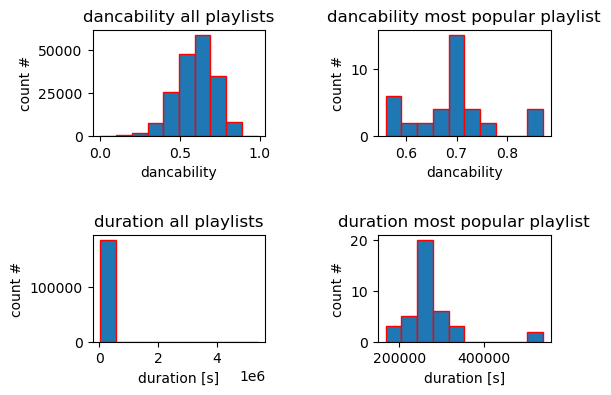

<Figure size 1000x1000 with 0 Axes>

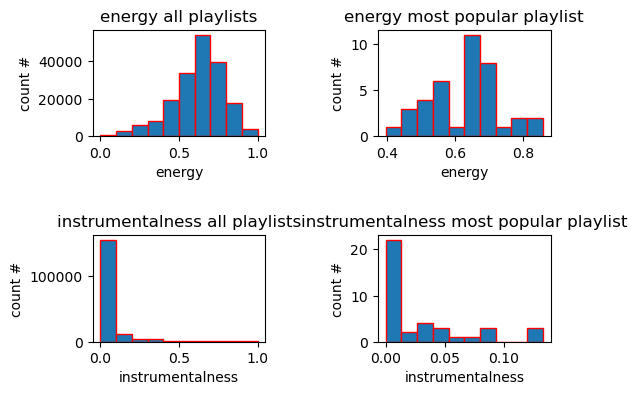

<Figure size 1000x1000 with 0 Axes>

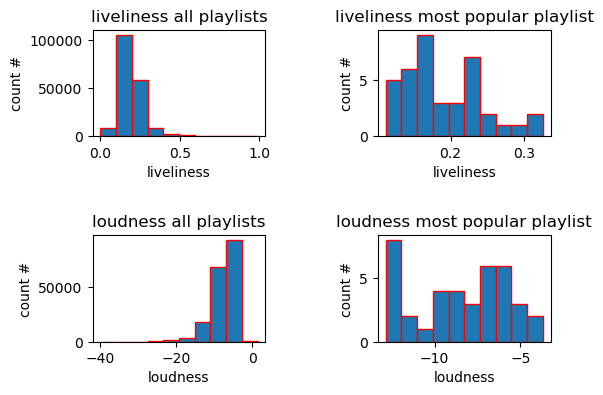

<Figure size 1000x1000 with 0 Axes>

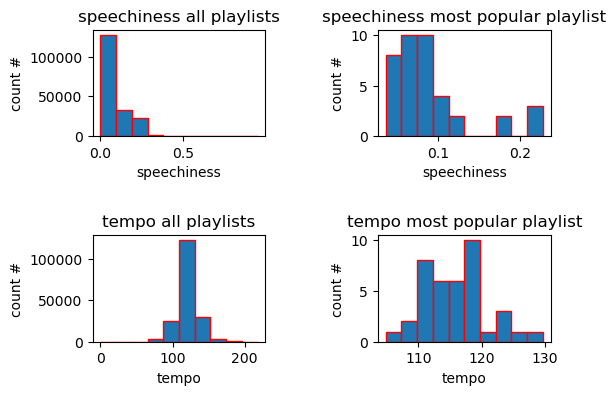

<Figure size 1000x1000 with 0 Axes>

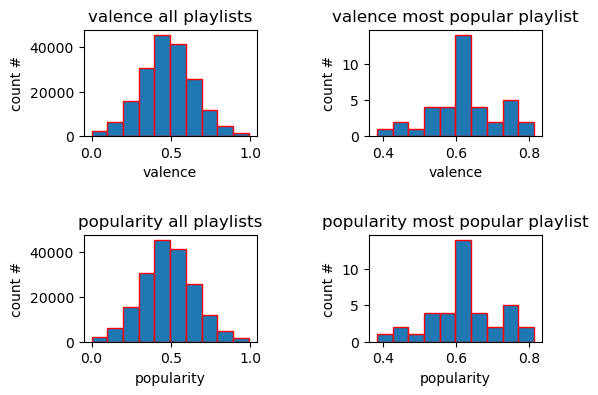

<Figure size 1000x1000 with 0 Axes>

In [7]:
all_keys = list(complete_playlist["That's What I Like"].keys())
plotHist(2,2,all_keys[2:4])
plotHist(2,2,all_keys[4:6])
plotHist(2,2,all_keys[6:8])
plotHist(2,2,all_keys[8:10])
plotHist(2,2,all_keys[10:12])

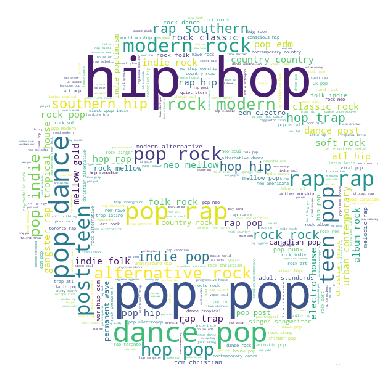

In [11]:
all_genres = []
for playlist_name in complete_playlist:
    all_genres += complete_playlist[playlist_name]['genres'] 
unique_string=(" ").join(all_genres)
mask = np.array(Image.open(r'Spotify_logo_without_text.png'))
wc = WordCloud(mask = mask, background_color = "white",
               max_words = 3000, max_font_size = 200,
               random_state = 2, width = mask.shape[1],
               height = mask.shape[0])
# lower max_font_size, change the maximum number of word and lighten the background:
wc.generate(unique_string)
plt.imshow(wc, interpolation="None")
plt.axis('off')
plt.show()